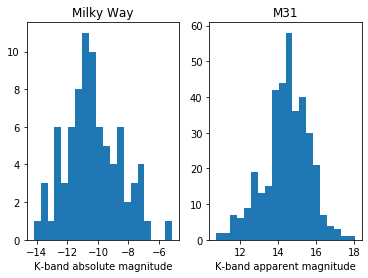

In [3]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
"""
# Nearby Spiral Globular Cluster Systems I: Luminosity Functions;
# Nantais J.B., Huchra J.P., Barmby P., Olsen K.A.G., Jarrett T.H.,
# Astronomical Journal 131, 1416-1425 (2006)
"""

absolute_MWG = np.loadtxt("GC_MWG_absolute.dat")
apparent_M31 = np.loadtxt("GC_M31_apparent.dat")

plt.figure()
plt.subplot(121)
plt.title("Milky Way")
plt.hist(absolute_MWG, bins=20)
plt.xlabel("K-band absolute magnitude")

plt.subplot(122)
plt.title("M31")
plt.hist(apparent_M31, bins=20)
plt.xlabel("K-band apparent magnitude")
plt.show()

## Exercise 1: looking at M31 globular clusters
### (a) is the M31 data normally distributed?
### (b) is the variance of M31 data the same as with MW?

## Exercise 2: the distance of M31
### (a) Using the Milky Way data as the GCLF, what is the distance of M31?

Assume that
- the GCLF in M31 is the same with the Milky Way 
- our data are complete and there are no absorption effects
- the distance of GCs from the center of M31 is small compared to the distance from us

### (b) what is the uncertainty of that estimate?

### (c) is the computed distance consistent with the Cepheid estimate for the distance modulus: $24.44 \pm 0.10\ \rm mag$?

### (d) Using the distance estimate, calculate the absolute magnitudes of M31 GCs and check if they follow the same distribution as MW GCs

Milky Way result:    p-value   = 0.675
M31 galaxy result:   p-value   = 0.00102
Milky way Gaussian model: -10.32 +/- 0.20
Andromeda Gaussian model: 14.46 +/- 0.06
Difference              : 24.78 +/- 0.21
Distance to M31         : 24.44 +/- 0.10


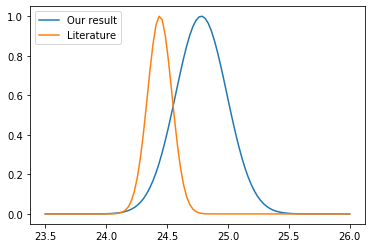

1.467543164997336


In [4]:
statistic, pvalue = st.shapiro(absolute_MWG)
print("Milky Way result:    p-value   = {:.3g}".format(pvalue))
statistic, pvalue = st.shapiro(apparent_M31)
print("M31 galaxy result:   p-value   = {:.3g}".format(pvalue))

#print(np.mean(apparent_M31) - np.mean(absolute_MW))
mwg_mean, mwg_sem = np.mean(absolute_MWG), st.sem(absolute_MWG)
m31_mean, m31_sem = np.mean(apparent_M31), st.sem(apparent_M31)
print("Milky way Gaussian model: {:.2f} +/- {:.2f}".format(mwg_mean, mwg_sem))
print("Andromeda Gaussian model: {:.2f} +/- {:.2f}".format(m31_mean, m31_sem))

diff_mean = m31_mean - mwg_mean
diff_std = (mwg_sem ** 2.0 + m31_sem ** 2.0) ** 0.5

modulus = 24.44
e_modulus = 0.1

print("Difference              : {:.2f} +/- {:.2f}".format(diff_mean, diff_std))
print("Distance to M31         : {:.2f} +/- {:.2f}".format(modulus, e_modulus))

x = np.linspace(23.5, 26, 100)
y_result = st.norm.pdf(x, loc=diff_mean, scale=diff_std)
y_theory = st.norm.pdf(x, loc=modulus, scale=e_modulus)
y_result = y_result / max(y_result)
y_theory = y_theory / max(y_theory)

plt.figure()
plt.plot(x, y_result, label="Our result")
plt.plot(x, y_theory, label="Literature")
plt.legend(loc="upper left")
plt.show()

result_vs_theory_sigmas = (diff_mean - modulus) / (diff_std ** 2.0 + e_modulus ** 2.0) ** 0.5
print(result_vs_theory_sigmas)

## Extra exercise 1: Normal approximation of Poisson distribution

It is known that the normal distribution is a good approximation of Poisson distribution when the parameter $\lambda$ is large.

#### (a) Can you quantify this claim using sampling and hypothesis testing? Choose a sample size $N$ and some $\lambda$ values.

#### (b) Do the results depend on the sample size?

#### (c) Do the results depend on the method? Use two tests at least.

For l=0.5
  SW: p-value = 1.12e-38
  KS: p-value = 3.58e-110
For l=3
  SW: p-value = 1.06e-18
  KS: p-value = 9.8e-26
For l=10
  SW: p-value = 3.95e-10
  KS: p-value = 2.42e-07
For l=30
  SW: p-value = 0.0012
  KS: p-value = 0.0215


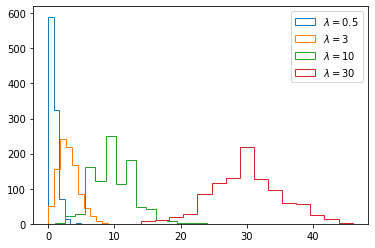

In [20]:
plt.figure()
sample_size = 1000
poisson_means_to_test = [0.5, 3, 10, 30]
for poisson_mean in poisson_means_to_test:
    sample = st.poisson.rvs(poisson_mean, size=sample_size)
    statistic, pvalue = st.shapiro(sample)
    print("For l={:.3g}".format(poisson_mean))
    print("  SW: p-value = {:.3g}".format(pvalue))
    
    norm_cdf = st.norm(loc=poisson_mean, scale=poisson_mean ** 0.5).cdf
    statistic, pvalue = st.kstest(sample, norm_cdf)
    print("  KS: p-value = {:.3g}".format(pvalue))
    
    nbins = min(15, max(sample) - min(sample) + 1)
    plt.hist(sample, bins=nbins, label=r"$\lambda = {:.2g}$".format(poisson_mean), histtype="step")
plt.legend()
plt.show()

## Extra exercise 2: Testing normality through K-S

#### (a) Can you test for 'normality' using the K-S test?

#### (b) If yes, how does it compare to the Shapiro-Wilk test when applied to our data (MW and M31)?